**IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn
%matplotlib inline

**EXPLORATORY DATA ANALYSIS**

In [2]:
#reading data into our original dataframe
df = pd.read_csv('./datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#getting all column names
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
#checking shape and type for whole dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
#there seem to be quite a few nulls, particularly in specific columns so we will get sums for all columns
pd.options.display.max_rows = 100
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

There are quite a few columns riddled with null values and therefore would not have a reliable mean to impute. The worst offenders are Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, with the others having fewer, but still significant nulls. We first need to decide how predictive these features might even be.
Pool QC : Pool quality
MiscFeature : Miscellaneous feature not covered in other categories
Alley : Type of alley access
Fence : Fence quality
FireplaceQu : Fireplace quality
Perhaps Pool QC and Fireplace quality has so many nulls because many of the properties do not feature a pool or fireplace. We can try to check this by analyzing Pool Area and Fireplaces respectively and seeing how many show values (1). MiscFeatures might have a similar reason to Pool QC: that is, there are few properties with features that were not covered by other categories. The same could be said for Alley and Fence, although it is somewhat difficult to render how much of an affect alley access would have on home value and there is no good proxy by which to analyze this, so we should probably drop this column. Let's look into some of these variables a bit deeper.

In [6]:
#checking for pools based on pool area to cross reference the null values in Pool QC.
df.loc[df['Pool Area'] > 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
657,1567,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,171000
761,2499,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,260000
952,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,...,0,228,Ex,NaN,NaN,0,8,2007,WD,315000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1130,2358,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,181000
1249,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,274970
1635,1941,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,...,0,368,TA,GdPrv,NaN,0,2,2007,WD,153000
1875,2279,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,...,0,561,TA,GdPrv,NaN,0,6,2007,WD,130000


In [7]:
#checking for properties with fireplaces to cross reference the null values in Fireplace quality
df.loc[df['Fireplaces'] > 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000
12,807,906226060,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,6,2009,WD,131000
18,2063,905107140,20,RL,71.0,8197,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2007,WD,143500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1051,528102030,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2008,New,394617
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


For both Fireplaces and Pool Area, the amount of properties they returned did not explain the amount of nulls in their corresponding quality columns. As a result, we should more than likely ignore the quality columns, and focus more interest on analyzing Fireplaces and Pool Area to evaluate those relationships as a pseudo-proxy.

In [8]:
#checking for values where miscellaneous values were higher than 0 to check discrepeancy found in Misc Feature
df.loc[df['Misc Val'] > 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
29,1957,535450190,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,122900
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
88,588,534129370,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,Shed,650,8,2009,WD,163000
111,1881,534252110,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdWo,Shed,600,8,2007,WD,139900
150,420,527455280,20,RL,NaN,10710,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,Shed,1200,7,2009,WD,148800
154,1885,534276160,20,RL,70.0,7535,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnWw,Shed,480,6,2007,WD,120000
155,1734,528221050,20,RL,88.0,12216,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Shed,2000,6,2007,WD,203000
210,24,527402200,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Shed,700,3,2010,WD,149000


This explains the null values perfect. From this we know that the null values in Misc features are simply because there are no miscellaneous features on that property. As a result, we can remove this column and just use Misc Val as a proxy for there being additional features to the property or not, especially considering Misc Val has no nulls.

Having sorted through the dominant sources of null values, we can go ahead and begin to analyze the correlations found between our Sale Price and the rest of the data frame.

In [9]:
#checking pre-engineered correlations
correl = df.corr()
correl['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

In [10]:
#removing aforementioned columns from our data frame
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1)

In [11]:
#checking head of our new dataframe to make sure it is as intended
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


In [12]:
#removing a few more columns from our data frame that show very little correlation with saleprice or will not be of use
df = df.drop(['Id', 'PID', 'MS SubClass', 'Bsmt Half Bath', 'Yr Sold', 'Misc Val', 'BsmtFin SF 2', 'Mo Sold', '3Ssn Porch',
             'Bsmt Half Bath'], axis = 1)

In [13]:
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Sale Type,SalePrice
0,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,TA,TA,Y,0,44,0,0,0,WD,130500
1,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,TA,TA,Y,0,74,0,0,0,WD,220000
2,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,0,52,0,0,0,WD,109000
3,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,TA,TA,Y,100,0,0,0,0,WD,174000
4,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,TA,TA,N,0,59,0,0,0,WD,138500


Since for many of our null columns we might want to impute the means, we will go ahead and do that before we begin engineering any of our columns.

In [14]:
#checking nulls on our cleaned up dataframe
df.isnull().sum()

MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full B

Lot frontage is defined roughly as the amount of street connected to the property. As this column has quite a few nulls (330) we need to decide how to handle these. It might be that 330 properties don't have any street connected to them because of how the property might sit, it could be different zoning rules or more rural properties. it also might be that these properties are not finished yet and are in development. I would suspect that using the street variable might be a better means to predict and we could remove the lot frontage variable. We would have to dummify the street variable to be able to get a glimpse. So we need to look into our Street variable and Lot Frontage variable a bit more.

In [15]:
df['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [16]:
df.loc[df['Lot Frontage'] == 0]

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Sale Type,SalePrice


In [17]:
df.loc[df['Lot Frontage'] > 0]

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Sale Type,SalePrice
1,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,TA,TA,Y,0,74,0,0,0,WD,220000
2,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,0,52,0,0,0,WD,109000
3,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,TA,TA,Y,100,0,0,0,0,WD,174000
4,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,TA,TA,N,0,59,0,0,0,WD,138500
5,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,TA,Y,0,0,0,0,0,WD,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,RL,96.0,12444,Pave,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,...,TA,TA,Y,0,66,0,0,0,New,394617
2046,RL,79.0,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,...,TA,TA,Y,0,276,0,0,0,WD,298751
2048,RL,57.0,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,...,Fa,Fa,Y,0,0,0,0,0,WD,177000
2049,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,TA,Y,0,189,140,0,0,WD,144000


In [18]:
df.loc[df['Lot Frontage'].isnull()]

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Sale Type,SalePrice
0,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,TA,TA,Y,0,44,0,0,0,WD,130500
7,RL,NaN,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,0,0,0,0,0,COD,142000
8,RL,NaN,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,TA,TA,Y,0,324,0,0,0,WD,112500
23,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,TA,Y,483,21,0,0,0,WD,185000
27,RL,NaN,11700,Pave,IR1,HLS,AllPub,Inside,Mod,Crawfor,...,TA,TA,Y,0,40,0,0,0,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,RL,NaN,7791,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,...,TA,TA,Y,0,0,0,0,0,WD,129000
2022,RL,NaN,16381,Pave,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,...,TA,TA,Y,0,73,216,0,0,WD,223000
2028,RL,NaN,20781,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,...,Gd,TA,Y,0,80,0,0,0,WD,262500
2031,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,...,TA,TA,Y,0,0,0,0,0,WD,149900


Nothing immediately presents itself as obvious regarding our Lot Frontage nulls. There are so many variables that could be influencing this. So we will handle this by imputing the mean and hope to catch any irregularities through dummifying other columns such as Lot Config and/or Lot Shape.

In [19]:
#imputing the mean of null values in the Lot Frontage category
df['Lot Frontage'].fillna((df['Lot Frontage'].mean()), inplace=True)

In [20]:
df['Lot Frontage'].isnull().sum()

0

The next set of nulls we are going to work on are the subclass related to garages. We see 113 or 114 values related to these. We can figure that this is more than likely to do with these properties not having garages at all, but lets check and then assign these nulls values.

In [21]:
df['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [22]:
df['Garage Type'].fillna('None', inplace=True)

In [23]:
df['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [24]:
df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), inplace=True)

In [25]:
df['Garage Yr Blt'].isnull().sum()

0

In [26]:
df['Garage Finish'].fillna('None', inplace = True)

In [27]:
df['Garage Finish'].value_counts()

Unf     849
RFn     579
Fin     509
None    114
Name: Garage Finish, dtype: int64

In [28]:
df['Garage Qual'].fillna('None', inplace = True)
df['Garage Qual'].value_counts()

TA      1832
None     114
Fa        82
Gd        18
Ex         3
Po         2
Name: Garage Qual, dtype: int64

In [29]:
df['Garage Cond'].fillna('None', inplace=True)
df['Garage Cond'].value_counts()

TA      1868
None     114
Fa        47
Gd        12
Po         8
Ex         2
Name: Garage Cond, dtype: int64

In [30]:
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Cars'].isnull().sum()

0

In [31]:
df['Garage Area'].fillna(0, inplace=True)
df['Garage Area'].isnull().sum()

0

Having cleaned up our Garage subclass of features, we need to next look at another subclass related to basement. Without a floors feature in the dataset I won't be able to tell if these are truly just without a basement or just a data entry issue. However, given the consistency across the class, I am going to treat these as properties without basements so I need to fill those nulls in with None, just like I did with the Garage variables.

In [32]:
df['Bsmt Qual'].fillna('None', inplace = True)
df['Bsmt Qual'].value_counts()

TA      887
Gd      864
Ex      184
Fa       60
None     55
Po        1
Name: Bsmt Qual, dtype: int64

In [33]:
df['Bsmt Qual'].isnull().sum()

0

In [34]:
df['Bsmt Cond'].fillna('None', inplace = True)
df['Bsmt Cond'].value_counts()

TA      1834
Gd        89
Fa        65
None      55
Po         5
Ex         3
Name: Bsmt Cond, dtype: int64

In [35]:
df['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [36]:
df['Bsmt Exposure'].fillna('None', inplace=True)

In [37]:
df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [38]:
df['BsmtFin Type 1'].fillna('None', inplace=True)

In [39]:
df['BsmtFin Type 2'].fillna('None', inplace=True)
df['BsmtFin Type 2'].value_counts()

Unf     1749
Rec       80
LwQ       60
None      56
BLQ       48
ALQ       35
GLQ       23
Name: BsmtFin Type 2, dtype: int64

There are two more significant columns with nulls and those are Mas Vnr Type and Mas Vnr Area which are defined as masonry veneer type and area. We should also suspect that these null values don't have masonry veneering and will therefore change Type to None and and Area to zeroes.

In [40]:
df['Mas Vnr Type'].fillna('None', inplace=True)
df['Mas Vnr Type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [41]:
df['Mas Vnr Area'].fillna(0, inplace=True)
df['Mas Vnr Area'].value_counts()

0.0      1238
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [45]:
#checking the remaining null values
df.isnull().sum()

MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       1
BsmtFin Type 2     0
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr

Since we are left with very few values that are still null and they happen to be in otherwise numeric columns, I am going to fill the remaining nulls throughout the dataframe.

In [47]:
df.fillna(0, inplace=True)
df.isnull().sum()

MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr

In [48]:
df.dtypes

MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
Bsmt Unf SF        float64
Total Bsmt SF      float64
Heating             object
Heating QC          object
C

**Feature Engineering**

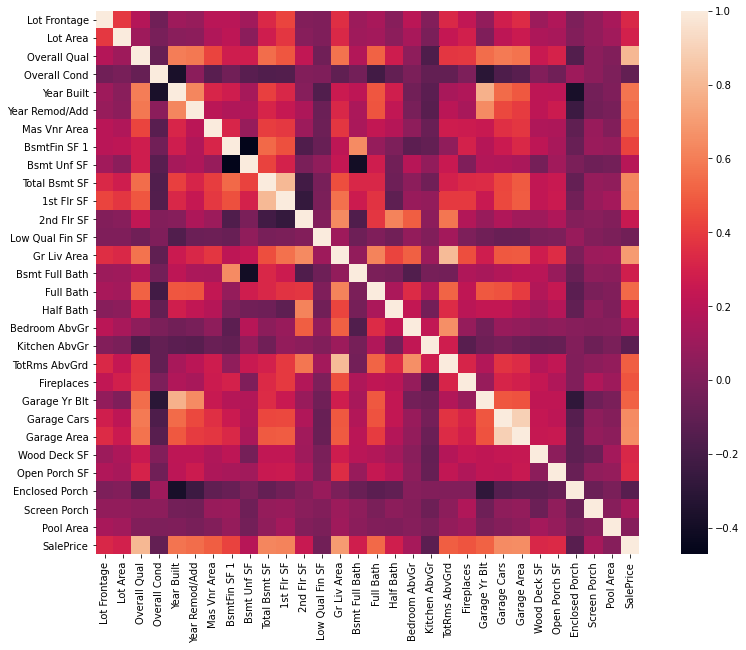

In [49]:
#checking correlation matrix
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), square=True)

In [ ]:
#there appears to be some strong multicollinearity between Garage Cars and Garage Area and also between 1st Flr SF and
#total basement squarefoot. We will drop Total Bsmt SF because that was a feature we cleaned quite a few nulls out of
#and we will remove Garage Area.

In [50]:
newdf = df.drop('Garage Area',axis=1,inplace=True)
newdf = df.drop('Total Bsmt SF', axis=1, inplace=True)

In [65]:
#now we will dummify a few intuitive categorical variables. Especially a few relating to some of the unanswered questions 
#from earlier
df = pd.get_dummies(data=df, columns=['Lot Config', 'Lot Shape', 'Condition 1', 'Garage Qual', 'Bsmt Qual', 'House Style', 'Exter Qual'])
df = pd.get_dummies(data=df, columns=['Neighborhood'])

In [63]:
#we can add all the square foot variables into a single square foot column representing total space
df['Total SF'] = df['BsmtFin SF 1'] + df['Bsmt Unf SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Low Qual Fin SF'] + df['Gr Liv Area']

In [64]:
#now we can remove non numerical columns that we do not plan on using
df.dtypes

MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Land Contour         object
                     ...   
House Style_SLvl      uint8
Exter Qual_Ex         uint8
Exter Qual_Fa         uint8
Exter Qual_Gd         uint8
Exter Qual_TA         uint8
Length: 101, dtype: object

In [68]:
df = df.drop(['MS Zoning', 'Street', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 2', 'Bldg Type', 'Roof Style',
         'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Cond', 'Foundation', 'Bsmt Cond',
         'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
         'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Cond', 'Paved Drive', 'Sale Type'],
        axis=1)

In [69]:
df.dtypes

Lot Frontage            float64
Lot Area                  int64
Overall Qual              int64
Overall Cond              int64
Year Built                int64
Year Remod/Add            int64
Mas Vnr Area            float64
BsmtFin SF 1            float64
Bsmt Unf SF             float64
1st Flr SF                int64
2nd Flr SF                int64
Low Qual Fin SF           int64
Gr Liv Area               int64
Bsmt Full Bath          float64
Full Bath                 int64
Half Bath                 int64
Bedroom AbvGr             int64
Kitchen AbvGr             int64
TotRms AbvGrd             int64
Fireplaces                int64
Garage Yr Blt           float64
Garage Cars             float64
Wood Deck SF              int64
Open Porch SF             int64
Enclosed Porch            int64
Screen Porch              int64
Pool Area                 int64
SalePrice                 int64
Total SF                float64
Lot Config_Corner         uint8
Lot Config_CulDSac        uint8
Lot Conf

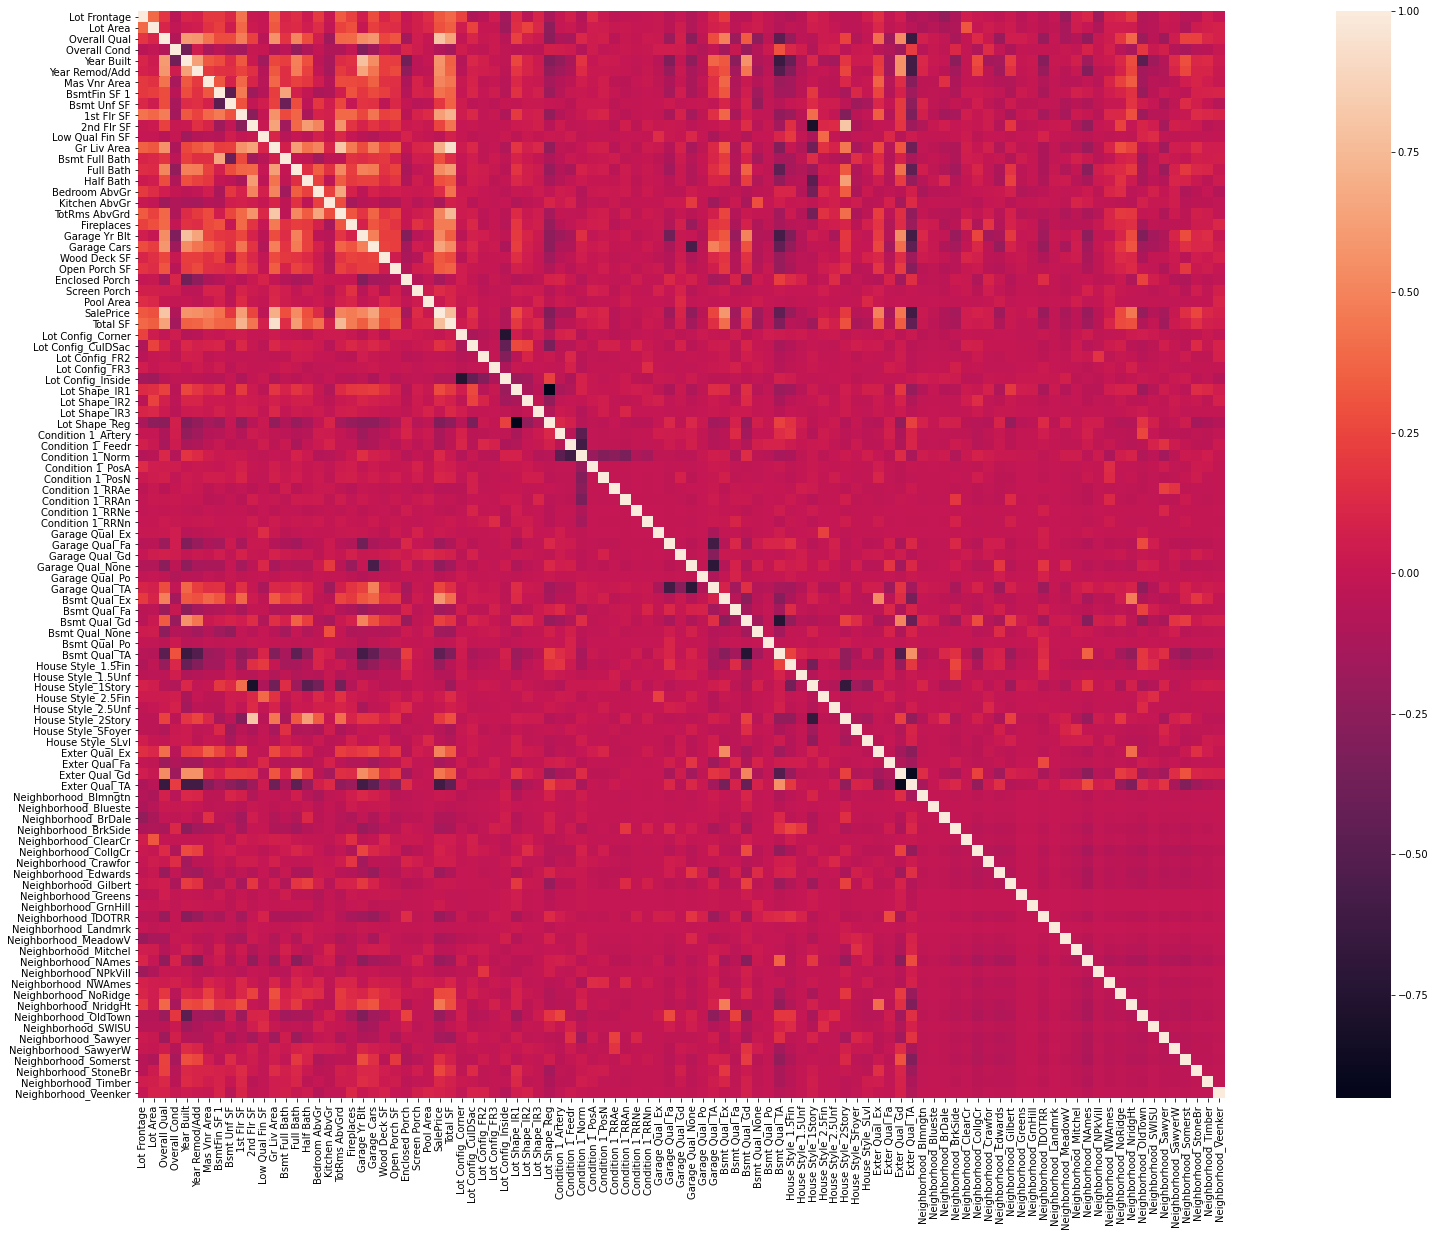

In [71]:
#check our new dataframe correlation matrix
fig,ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.corr(), square=True)

In [72]:
correl = df.corr()
correl['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
Overall Qual            0.800207
Total SF                0.766743
Gr Liv Area             0.697038
Garage Cars             0.647781
1st Flr SF              0.618486
Bsmt Qual_Ex            0.586497
Year Built              0.571849
Year Remod/Add          0.550370
Full Bath               0.537969
Garage Yr Blt           0.516738
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Exter Qual_Ex           0.493861
Fireplaces              0.471093
Neighborhood_NridgHt    0.448647
Exter Qual_Gd           0.446685
BsmtFin SF 1            0.423856
Open Porch SF           0.333476
Wood Deck SF            0.326490
Lot Frontage            0.325850
Lot Area                0.296566
Bsmt Full Bath          0.283332
Half Bath               0.283001
Lot Shape_IR1           0.273574
Neighborhood_NoRidge    0.263395
Neighborhood_StoneBr    0.256977
Garage Qual_TA          0.249773
2nd Flr SF              0.248452
Bsmt Qual_Gd            0.226836
House Styl

**Modeling**

In [73]:
target = df['SalePrice']
target.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [74]:
df = df.drop(['SalePrice'], axis=1)

In [75]:
#load our vairables into our train test split
df_train, df_test, target_train, target_test = train_test_split(df, target, random_state = 42)

In [76]:
#instantiate our linearregression model
lr = LinearRegression()

In [78]:
#fit our LR model
lr.fit(df_train,target_train)

LinearRegression()

In [79]:
lr.score(df_train, target_train)

0.8820017624482612

In [81]:
lr.score(df_test, target_test)

0.8791259525606836

In [82]:
#set our predicted values so we can check how close we are to our predicted target
preds = lr.predict(df)

In [83]:
#checking root mean squared error to get an inuitive understanding of how accurate our model is
rmse = np.sqrt(mean_squared_error(target,preds))
rmse

27299.33312239503

In [94]:
sortedcoef = (sorted(zip(lr.coef_, df)))

In [100]:
print(sortedcoef)

[(-45101.18420119634, 'Lot Shape_IR3'), (-28533.328383795055, 'Garage Qual_Po'), (-24948.665460586686, 'Neighborhood_BrDale'), (-24601.018514858602, 'Neighborhood_Edwards'), (-23048.56738565534, 'Kitchen AbvGr'), (-22791.64328427914, 'Neighborhood_MeadowV'), (-18659.921123445893, 'Neighborhood_Blueste'), (-18316.549620261438, 'Exter Qual_Fa'), (-16150.334195283998, 'Neighborhood_IDOTRR'), (-15803.507336365623, 'Neighborhood_NWAmes'), (-15628.893721305782, 'Neighborhood_Landmrk'), (-15582.716802831126, 'House Style_2Story'), (-15312.706633607146, 'Condition 1_RRNn'), (-14911.182133627719, 'Exter Qual_TA'), (-14767.80374967655, 'Neighborhood_NPkVill'), (-13289.953065049516, 'Neighborhood_OldTown'), (-12351.847954296285, 'Neighborhood_Sawyer'), (-12303.188717970106, 'Bsmt Qual_None'), (-11967.99658453523, 'House Style_2.5Unf'), (-11257.675249092845, 'Neighborhood_Blmngtn'), (-10868.447115257974, 'Neighborhood_Gilbert'), (-10549.431461353279, 'Garage Qual_TA'), (-10516.729867205891, 'Condi

Our model shows some decent scores through the regression metrics. It is able to explain nearly 90% of the Sale price of a home. Practically speaking, our model is able to predict within $27,299.33 of the actual sale price of the home. Going a bit beyond the more basic intuition has helped our model significantly. However, it looks like dummifying non-numeric variables has helped us tremendously. As we can see many neighborhoods have very strong coefficients both positive and neighborhood. Our 10 most highly negatively correlated regressors are: Lot_Shape_IR3, Garage_Qual_Po, Neighborhood_BrDale, Neighborhood_Edwards, Kitchen AbvGr, Neighborhood_MeadowV, Neighborhood_Blueste, Exter_Qual_Fa, Neighborhood_IDOTRR, Neighborhood_NWAmes. While our 10 most highly positively correlated regressors are: Neighborhood_GrnHill, Neighborhood_StoneBr, Exter Qual_Ex, Neighborhood_NoRidge, House Style_2.5Fin, Garage Qual_Ex, Neighborhood_NridgHt, Condition 1_PosN, Lot Shape_IR2, Bsmt Qual_Ex. Of our 20 most significant regressors 10 of them happen to be neighborhoods. Place matters significantly when determining the price of a house; in fact place is able to explain as much as $99,331 of the price as in the case of Neighborhood_GrnHill.